# Developing an ML model for Customer Subscription Prediction

In [1]:
# Importing Libraries

import pandas as pd 
import numpy as np
import seaborn as sns

In [3]:
# Loading dataset

data =  pd.read_csv("Processed_final.csv")

In [6]:
# Header view of dataset

data.head()

,student_id,minutes_watched,days_engage,eng_quiz,eng_exam,eng_hub_qa,st_purch
0,258798,0.3,1,0,0,0,0
1,258799,0.0,0,0,0,0,0
2,258800,531.2,29,1,1,0,1
3,258801,0.0,0,0,0,0,0
4,258802,0.0,0,0,0,0,0


In [7]:
# Shape of dataset

data.shape

(35226, 7)

In [8]:
# Droping unwanted columns

data = data.drop(columns=['student_id'], axis=1)

In [9]:
# Header view of dataset after droping columns 

data.head()

,minutes_watched,days_engage,eng_quiz,eng_exam,eng_hub_qa,st_purch
0,0.3,1,0,0,0,0
1,0.0,0,0,0,0,0
2,531.2,29,1,1,0,1
3,0.0,0,0,0,0,0
4,0.0,0,0,0,0,0


In [10]:
# Checking for Null values

data.isnull().sum()

minutes_watched    0
days_engage        0
eng_quiz           0
eng_exam           0
eng_hub_qa         0
st_purch           0
dtype: int64

In [11]:
# Detail information of Dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35226 entries, 0 to 35225
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minutes_watched  35226 non-null  float64
 1   days_engage      35226 non-null  int64  
 2   eng_quiz         35226 non-null  int64  
 3   eng_exam         35226 non-null  int64  
 4   eng_hub_qa       35226 non-null  int64  
 5   st_purch         35226 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.6 MB


In [12]:
# Describe view fo values in dataset

data.describe()

,minutes_watched,days_engage,eng_quiz,eng_exam,eng_hub_qa,st_purch
count,35226.000000,35226.000000,35226.000000,35226.000000,35226.000000,35226.000000
mean,52.295943,1.855760,0.212513,0.110969,0.008204,0.060609
std,285.604205,6.740604,0.409092,0.314098,0.090206,0.238614
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,7642.100000,155.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Checking for value destribution count in target variable 'st_purch'

data.st_purch.value_counts()

0    33091
1     2135
Name: st_purch, dtype: int64

c:\Users\sntu8\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='st_purch', ylabel='count'>

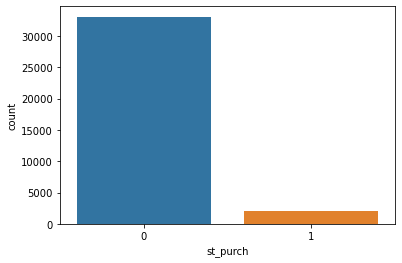

In [14]:
# Counter plot for Target variable value distribution

sns.countplot(data.st_purch)

By looking at this graph we can observe that dataset target variable is highely imbalanced.

In [12]:
# Importing Libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Finding Correlation in dataset using corr() function.

data.corr()

,minutes_watched,days_engage,eng_quiz,eng_exam,eng_hub_qa,st_purch
minutes_watched,1.000000,0.883385,0.317221,0.437043,0.419909,0.532683
days_engage,0.883385,1.000000,0.375397,0.478109,0.424389,0.595716
eng_quiz,0.317221,0.375397,1.000000,0.479048,0.142769,0.397058
eng_exam,0.437043,0.478109,0.479048,1.000000,0.197315,0.505701
eng_hub_qa,0.419909,0.424389,0.142769,0.197315,1.000000,0.247276
st_purch,0.532683,0.595716,0.397058,0.505701,0.247276,1.000000


<AxesSubplot:>

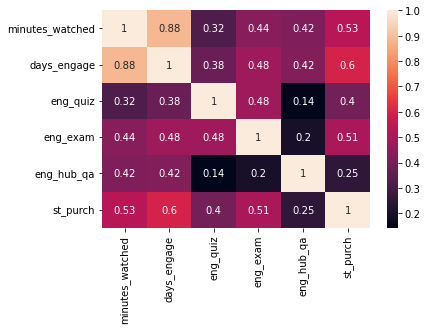

In [14]:
# Using heatmap for visualizing Correlation of dataset

sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='minutes_watched', ylabel='days_engage'>

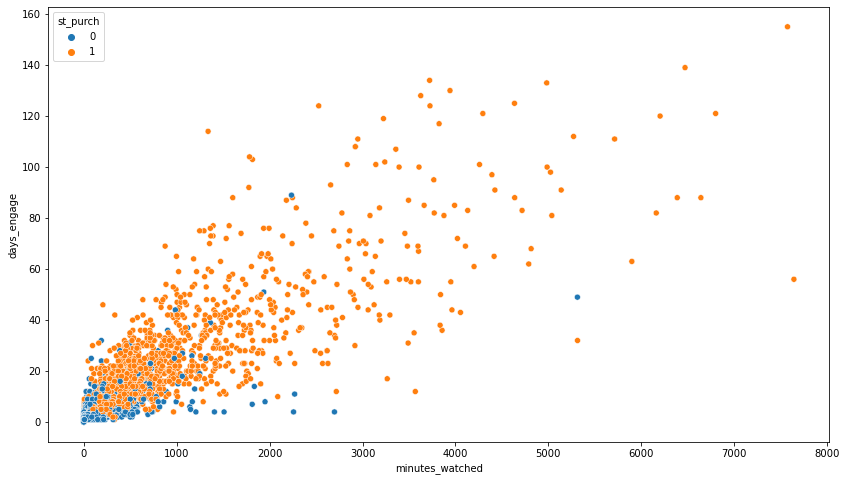

In [15]:
# Scatterplot for purchase over minutes watched and days engaged

plt.figure(figsize=(14, 8))
sns.scatterplot(x='minutes_watched', y='days_engage', data=data, hue='st_purch')

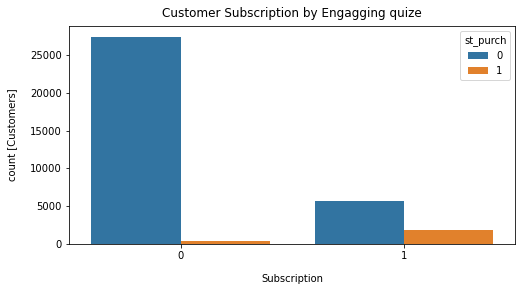

In [16]:
plt.figure(figsize=(8, 4))
sns.countplot(x='eng_quiz', hue='st_purch', data=data)
plt.title("Customer Subscription by Engagging quize", y=1.015)
plt.ylabel("count [Customers]", labelpad=13)
plt.xlabel("Subscription", labelpad=13);

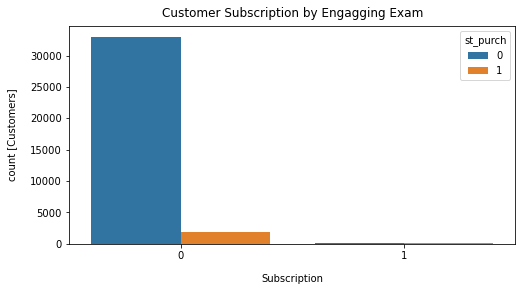

In [17]:
plt.figure(figsize=(8, 4))
sns.countplot(x='eng_hub_qa', hue='st_purch', data=data)
plt.title("Customer Subscription by Engagging Exam", y=1.015)
plt.ylabel("count [Customers]", labelpad=13)
plt.xlabel("Subscription", labelpad=13);

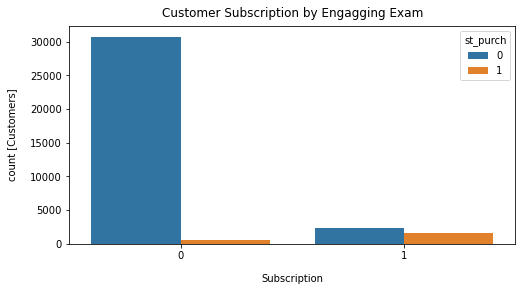

In [18]:
plt.figure(figsize=(8, 4))
sns.countplot(x='eng_exam', hue='st_purch', data=data)
plt.title("Customer Subscription by Engagging Exam", y=1.015)
plt.ylabel("count [Customers]", labelpad=13)
plt.xlabel("Subscription", labelpad=13);

## Balancing dataset

In [19]:
# Balancing the Target variable in dataset

from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = data[(data['st_purch']==0)] 
df_minority = data[(data['st_purch']==1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 33091, # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [20]:
# Storing Balanced dataset in new variable 'df_upsampled' 

df_upsampled.head()

,minutes_watched,days_engage,eng_quiz,eng_exam,eng_hub_qa,st_purch
11192,59.2,2,1,1,0,1
17864,152.2,11,1,1,0,1
15643,63.3,2,1,1,0,1
15283,1419.5,29,1,1,0,1
23237,1.2,2,0,0,0,1


In [21]:
# Shape of balanced dataset

df_upsampled.shape

(66182, 6)

In [22]:
# Changing column names

df = df_upsampled.set_axis(["minutes_watched",
                            "days_engaged",
                            "engaged_quiz",
                            "engaged_exam",
                            "engaged_QandA_hub",
                            "purchased"],axis=1)

In [23]:
# Dataset view after changing dataset

df.head() 

,minutes_watched,days_engaged,engaged_quiz,engaged_exam,engaged_QandA_hub,purchased
11192,59.2,2,1,1,0,1
17864,152.2,11,1,1,0,1
15643,63.3,2,1,1,0,1
15283,1419.5,29,1,1,0,1
23237,1.2,2,0,0,0,1


In [24]:
# Reset of index values

df=df.reset_index(drop=True)

In [25]:
# Dataset view after reset index value

df.head()

,minutes_watched,days_engaged,engaged_quiz,engaged_exam,engaged_QandA_hub,purchased
0,59.2,2,1,1,0,1
1,152.2,11,1,1,0,1
2,63.3,2,1,1,0,1
3,1419.5,29,1,1,0,1
4,1.2,2,0,0,0,1


<AxesSubplot:>

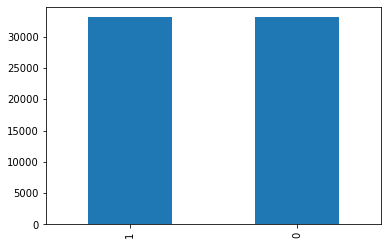

In [26]:
# Visaul view of Balanced target variable

dd = df.purchased.value_counts()
dd.plot(kind='bar')

In [27]:
# Spliting Dataset into x and y
# x (input pariable) = minits_watched, days_engagged_with_platform, Engagged_quize, Engagged_exam, Engagged_q/a_hub
# y (Target or output) = Purchased

x = df.iloc[:,:-1]
y = df.purchased

In [28]:
# Input variables

x.head()

,minutes_watched,days_engaged,engaged_quiz,engaged_exam,engaged_QandA_hub
0,59.2,2,1,1,0
1,152.2,11,1,1,0
2,63.3,2,1,1,0
3,1419.5,29,1,1,0
4,1.2,2,0,0,0


In [29]:
# Output variable

y.head()

0    1
1    1
2    1
3    1
4    1
Name: purchased, dtype: int64

In [30]:
# Shape of input and output variable

x.shape,y.shape

((66182, 5), (66182,))

In [31]:
# Spliting date set for train and test using sklearn

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)

In [32]:
# Shape of train and test 

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((52945, 5), (13237, 5), (52945,), (13237,))

# ML Models

## Navie Bayes

In [33]:

from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(xtrain,ytrain)
print("accuracy of Naive Based",NB.score(xtest,ytest)*100)

accuracy of Naive Based 86.6737176097303


## Support vector machine

In [34]:

from sklearn.svm import SVC
SVM = SVC()
SVM.fit(xtrain,ytrain)
print("accuracy of SVM",SVM.score(xtest,ytest)*100)

accuracy of SVM 88.1770793986553


## Logistic Regression

In [35]:

from sklearn.linear_model import LogisticRegression
LG = LogisticRegression()
LG.fit(xtrain,ytrain)
print("accuracy of Naive Based",LG.score(xtest,ytest)*100)

accuracy of Naive Based 89.00808340258367


## KNN

In [36]:

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5,
                           weights='uniform',
                           algorithm='auto',
                           leaf_size=30,
                           p=2,
                           metric='minkowski',
                           metric_params=None)
KNN.fit(xtrain,ytrain)
print("accuracy of Naive Based",KNN.score(xtest,ytest)*100)

accuracy of Naive Based 93.29908589559568


## Decision Tree

In [37]:

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",random_state = 100,max_depth=5,min_samples_leaf=8)
DT.fit(xtrain,ytrain)
print("accuracy of Naive Based",DT.score(xtest,ytest)*100)

accuracy of Naive Based 89.33293042230113


## Random Forest

In [38]:

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)
RF.fit(xtrain,ytrain)
print("accuracy of Naive Based",RF.score(xtest,ytest)*100)

accuracy of Naive Based 89.68044118758026


# Model validation

In [39]:
# Predicting model using Random Forest

ypred = RF.predict(xtest)

In [40]:
# Sample of y prediction

ypred[:10]

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [41]:
# Sample of y test

ytest[:10]

19285    1
27318    1
14369    1
54140    0
10441    1
3620     1
65245    0
28562    1
11614    1
63048    0
Name: purchased, dtype: int64

## Confusion matrix

In [42]:
pd.value_counts(ypred)

0    7124
1    6113
dtype: int64

In [43]:
class_names = ["Not_Subscribed", "Subscribed"]

In [44]:
import itertools


def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    name = None    
    fmt = 'd'
    thresh = cm.max() / 2
    # i and j tell us the coordinates of boxes
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if i == 0 and j == 0:
            name = "True Negatives"
        elif i == 0 and j == 1:
            name = "False Positives"
        elif i == 1 and j == 1:
            name = "True Positives"
        else:
            name = "False Negatives"
        plt.text(j, i, format(cm[i, j], fmt) + "\n" + name, horizontalalignment="center", 
                 fontsize=23, color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', labelpad=12)
    plt.xlabel('Predicted label', labelpad=12)
    plt.title(title, y=1.02)
    plt.tight_layout()

In [45]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(ytest, ypred);
np.set_printoptions(precision=2);

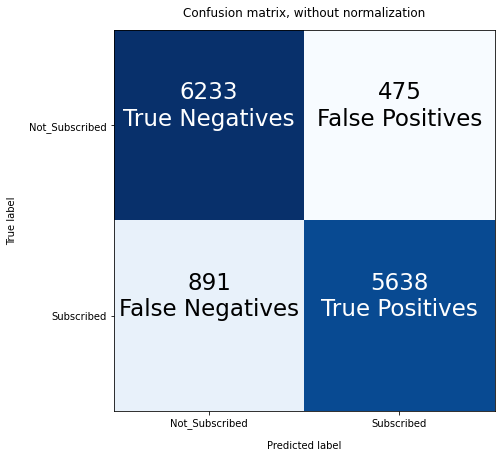

In [46]:
plt.figure(figsize=(7, 7))
plt.grid(False)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

In [47]:
from sklearn.metrics import precision_score

print("Precision: {0}".format(precision_score(ytest, ypred)))

Precision: 0.9222967446425651


In [48]:
from sklearn.metrics import recall_score

print("Recall:", round(recall_score(ytest, ypred), 2))

Recall: 0.86


# User Interface

In [49]:
# importing library

import gradio as gr

In [50]:
# Creating function

def subscription(minutes_watched, days_engaged, engaged_quiz, engaged_exam,engaged_QandA_hub):
#turning the arguments into a numpy array  

        x = np.array([minutes_watched, days_engaged, engaged_quiz, engaged_exam,engaged_QandA_hub])
        prediction = RF.predict(x.reshape(1, -1))
        if prediction==0:
            #return prediction["score"]
            return "Not Subscribed"
        
        else:
            #return prediction["score"]
             return "Subscribed"

In [51]:
# Creating user interface

app = gr.Interface(fn=subscription,
            inputs=[gr.inputs.Number(label="Minits watched on Platform"),
                    gr.inputs.Number(label="No of days engaged with platform"),
                    gr.inputs.Radio(choices=[1,0],optional=bool,label="Engaging with quize"),
                    gr.inputs.Radio(choices=[1,0],optional=bool,label="Engaging with Exam"),
                    gr.inputs.Radio(choices=[1,0],optional=bool,label="Engaging with Q/A Hub")],
             outputs=gr.outputs.Label(num_top_classes=2),
             title="Developing an ML Model for Customer Subscription Prediction"
            )

c:\Users\sntu8\anaconda\lib\site-packages\gradio\inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\sntu8\anaconda\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\sntu8\anaconda\lib\site-packages\gradio\inputs.py:183: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\sntu8\anaconda\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
c:\Users\sntu8\anaconda\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  war

In [52]:
# Lanching the application

app.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
